<a href="https://colab.research.google.com/github/SugreshwarChandike/AI-Traffic-Controller/blob/main/traffic_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Setup***

In [1]:
# Import libraries
import random
import matplotlib.pyplot as plt

***Simulate traffic***

In [2]:
import pandas as pd

# Load the traffic data
df = pd.read_csv('sample_traffic.csv')
print(df)

   lane_1  lane_2  emergency
0      12       5      False
1       8      15       True
2      10      10      False
3      20       3      False
4       5      18       True
5       0       0      False


In [3]:
# Simulate number of cars in each lane
lane_1 = random.randint(0, 20)
lane_2 = random.randint(0, 20)

print(f"Lane 1 cars: {lane_1}")
print(f"Lane 2 cars: {lane_2}")

Lane 1 cars: 8
Lane 2 cars: 18


***Emergency Detection***

In [19]:
# Simulate emergency vehicle detection
emergency_detected = random.choice([False, True])
if emergency_detected:
    print("🚨 Emergency vehicle detected! Giving priority.")

🚨 Emergency vehicle detected! Giving priority.


***Decicion Logic***

In [21]:
# Decide which lane gets green light
def decide_light(l1, l2, emergency, emergency_lane=None):
    if emergency and emergency_lane:
        return f"Green for {emergency_lane} (Emergency)"
    elif l1 > l2:
        return "Green for Lane 1"
    elif l2 > l1:
        return "Green for Lane 2"
    else:
        return "Equal traffic. Alternate lanes."

emergency_lane = None
if emergency_detected:
    emergency_lane = random.choice(["Lane 1", "Lane 2"])

decision = decide_light(lane_1, lane_2, emergency_detected, emergency_lane)
print(f"🟢 Decision: {decision}")

🟢 Decision: Green for Lane 2 (Emergency)


***VIsualize Traffic Lights***

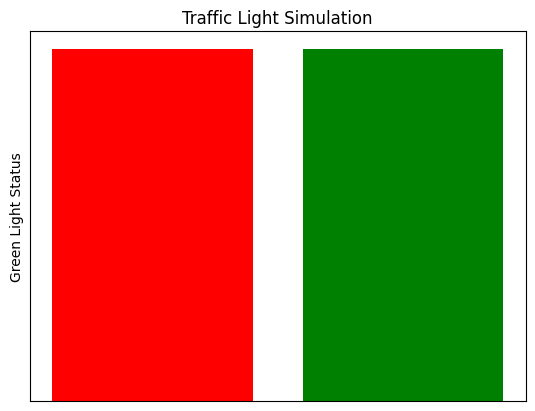

In [22]:
# Visualize decision
colors = ['red', 'green']
if decision == "Green for Lane 1":
    plt.bar(['Lane 1', 'Lane 2'], [1, 1], color=[colors[1], colors[0]])
elif decision == "Green for Lane 2":
    plt.bar(['Lane 1', 'Lane 2'], [1, 1], color=[colors[0], colors[1]])
elif decision == "Green for Lane 1 (Emergency)":
    plt.bar(['Lane 1', 'Lane 2'], [1, 1], color=[colors[1], colors[0]])
elif decision == "Green for Lane 2 (Emergency)":
    plt.bar(['Lane 1', 'Lane 2'], [1, 1], color=[colors[0], colors[1]])
else:
    plt.bar(['Lane 1', 'Lane 2'], [1, 1], color=[colors[1], colors[1]]) # Assuming both get green or alternate which can be represented as both green

plt.title("Traffic Light Simulation")
plt.ylabel("Green Light Status")
plt.xticks([]) # Hide x-axis labels for cleaner look
plt.yticks([]) # Hide y-axis labels for cleaner look
plt.show()